In [1]:
import tensorflow as tf
tf.keras.Model
tf.keras
print(tf.keras.__version__)
tf.test.gpu_device_name()

2022-12-22 12:21:24.865484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


2022-12-22 12:21:28.557176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 12:21:28.616248: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 12:21:28.622422: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 12:21:28.622786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_nod

'/device:GPU:0'

In [2]:
#!pip install pandas
#!pip install --timeout=10000 matplotlib
#!pip install pydot
#!pip install tensorflow-text

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Common-Credentials/10-million-password-list-top-1000000.txt"

df_in = pd.read_csv(url, header=None)
df_in = pd.read_csv(url, header=None)

def add_space(x):
    return " ".join(x)

# We load the list, add a space between each letter and add an EOP (End of Passwort) Symbol pp. Since this is the only 2 letter "word" the EOP is unique.

df = df_in[0].dropna().apply(lambda x: add_space(x) + " pp")


In [4]:
df_flat = [num for elem in [ x.split() for x in df] for num in elem]

In [5]:
# We generate the observed sequence and the next word to be predicted (target).
sequences = []
target =[]
for row in df[:1000]:
    i=-1
    row_sequences = []
    for letter in row.split():
        if i>0:
            row_sequences.append(row_sequences_dummy)
            row_sequences_dummy = row_sequences_dummy + [letter]
            target.append([letter])
        else:
            row_sequences_dummy=[letter]
        i=i+1
    sequences.append(row_sequences)

/tmp/ipykernel_6785/161818199.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for row in df[:1000]:


In [6]:
from keras.preprocessing.text import Tokenizer

#We us a Tokenizer to code each Letter into a number

tokenizer  = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(df)

# Translation from Word to Token and back
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = len(word2idx) + 1

In [7]:
import numpy as np
#Apply our mapping to the dataset
def convert_to_mat_array(sequence):
    return [tokenizer.texts_to_matrix(elem) for elem in sequence]

tok_sequences = np.array( [np.array(num) for elem in [convert_to_mat_array(row) for row in sequences] for num in elem] )
#tok_sequences = np.array([np.array(num) for elem in [tokenizer.texts_to_matrix(row) for row in sequences] for num in elem])

tok_target = tokenizer.texts_to_matrix(target)

/tmp/ipykernel_6785/3502889913.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tok_sequences = np.array( [np.array(num) for elem in [convert_to_mat_array(row) for row in sequences] for num in elem] )


In [15]:
print( tok_sequences.shape )
print( tok_target.shape)

(5407,)
(5407, 70)


In [14]:
tok_sequences

array([array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0.]])                                      ,
       array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           

In [16]:
X_train = tok_sequences
y_train = tok_target
# https://stackoverflow.com/questions/43341374/tensorflow-dynamic-rnn-lstm-how-to-format-input
# https://r2rt.com/recurrent-neural-networks-in-tensorflow-i.html
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(None ,None, vocab_size)),
  #tf.keras.layers.Masking(mask_value=0),
  tf.keras.layers.Dense(vocab_size, activation='relu'),
  #tf.keras.layers.LSTM(128, return_sequences=True), # skips masked timesteps
  tf.keras.layers.Dense(vocab_size, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['mae'])

model.fit( X_train , y_train, epochs=10, verbose=1)    # I am not sure if my fitting here works, my code does not make it here

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
predictions = model.predict( tok_sequences )
print(predictions)

17/17 [==============================] - 0s 7ms/step
[[1.3142283e-04 1.6391954e-04 2.2010896e-03 ... 1.3707268e-04
  1.5253430e-04 7.8919256e-05]
 [2.7179361e-05 2.7045993e-05 1.3092154e-03 ... 3.0299207e-05
  2.8190141e-05 1.3056929e-05]
 [7.7168606e-06 9.4892748e-06 9.5031509e-04 ... 9.3157169e-06
  1.1552297e-05 5.2104861e-06]
 ...
 [2.3991940e-06 4.1045232e-06 7.8724902e-03 ... 2.9225923e-06
  3.9939482e-06 4.9348041e-06]
 [4.4164312e-07 5.3607675e-07 3.8763660e-03 ... 4.1404576e-07
  4.8245181e-07 5.4810948e-07]
 [1.8278470e-07 1.3855595e-07 2.5521361e-03 ... 2.0217300e-07
  1.9048555e-07 2.3700161e-07]]


In [ ]:
# Now comes the model. Do we need patching? idk

in = Input(shape=(None, num_words)) # let's assume it is one-hot encoded words
latent = Masking()(in) # sentences in same batch need to same length, padded
latent = LSTM(latent_size)(latent) # skips masked timesteps
out = Dense(num_words, activation='softmax')
model = Model(in, out)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


SyntaxError: invalid syntax (4280756759.py, line 3)

In [ ]:
sequences = tokenizer.texts_to_sequences(df_flat)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
sequence_data = tokenizer.texts_to_sequences(df)[0]
sequence_data[:10]
lengt_sequence=1
sequences = []
for i in range(lengt_sequence, len(sequence_data)):
    words = sequence_data[i-lengt_sequence:i+1]
    sequences.append(words)

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:lengt_sequence])
    y.append(i[-1])

In [ ]:
print(X)
print(y)

[[4], [1], [10], [1], [16], [1], [24], [1], [18], [1], [23], [1], [2]]
[1, 10, 1, 16, 1, 24, 1, 18, 1, 23, 1, 2, 2]


In [ ]:
input_data = data[:-10]
targets = data[10:]
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    input_data, targets, sequence_length=10)


NameError: name 'data' is not defined

In [ ]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0
)
# https://stackoverflow.com/questions/50527332/keras-lstm-to-predict-next-word-with-variable-length-sequences

In [ ]:
in = Input(shape=(None, num_words)) # let's assume it is one-hot encoded words
latent = Masking()(in) # sentences in same batch need to same length, padded
latent = LSTM(latent_size)(latent) # skips masked timesteps
out = Dense(num_words, activation='softmax')
model = Model(in, out)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
sequences

[[4, 1, 10, 1],
 [1, 10, 1, 16],
 [10, 1, 16, 1],
 [1, 16, 1, 24],
 [16, 1, 24, 1],
 [1, 24, 1, 18],
 [24, 1, 18, 1],
 [1, 18, 1, 23],
 [18, 1, 23, 1],
 [1, 23, 1, 2],
 [23, 1, 2, 2]]

In [ ]:
matrix = tokenizer.texts_to_matrix(df[:100])


/tmp/ipykernel_4870/3943800821.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  matrix = tokenizer.texts_to_matrix(df[:100])


In [ ]:
matrix.shape

(100, 70)

In [ ]:
# import for processing dataset
from tf.data.Dataset import from_tensor_slices
from tf.data.experimental import AUTOTUNE

# convert dataset into tensor slices
with tf.device('/cpu:0'):
    train_data =from_tensor_slices((train_df.question_text.values,
        train_df.target.values))
    valid_data = from_tensor_slices((valid_df.question_text.values,
        valid_df.target.values))

    for text, label in train_data.take(2):
        print(text)
        print(label)

In [ ]:
sequences

[[3],
 [9],
 [15],
 [23],
 [17],
 [22],
 [1],
 [32],
 [2],
 [11],
 [11],
 [27],
 [5],
 [6],
 [19],
 [1],
 [3],
 [9],
 [15],
 [23],
 [17],
 [22],
 [20],
 [21],
 [1],
 [37],
 [27],
 [4],
 [6],
 [12],
 [18],
 [1],
 [3],
 [9],
 [15],
 [23],
 [17],
 [22],
 [20],
 [21],
 [14],
 [1],
 [3],
 [9],
 [15],
 [23],
 [17],
 [1],
 [3],
 [9],
 [15],
 [23],
 [1],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [1],
 [3],
 [9],
 [15],
 [23],
 [17],
 [22],
 [20],
 [1],
 [19],
 [6],
 [2],
 [30],
 [5],
 [10],
 [1],
 [3],
 [9],
 [15],
 [3],
 [9],
 [15],
 [1],
 [28],
 [2],
 [11],
 [4],
 [28],
 [2],
 [13],
 [13],
 [1],
 [2],
 [28],
 [24],
 [3],
 [9],
 [15],
 [1],
 [34],
 [5],
 [5],
 [12],
 [28],
 [2],
 [13],
 [13],
 [1],
 [16],
 [5],
 [10],
 [29],
 [4],
 [18],
 [1],
 [13],
 [4],
 [12],
 [16],
 [4],
 [8],
 [10],
 [1],
 [22],
 [14],
 [22],
 [14],
 [22],
 [14],
 [1],
 [11],
 [26],
 [2],
 [19],
 [5],
 [27],
 [1],
 [16],
 [2],
 [11],
 [12],
 [4],
 [6],
 [1],
 [22],
 [22],
 [22],
 [22],
 [22],
 [22],
 [1],
 [37],
 [27],
 [4],

In [ ]:
# As a benchmark we will train a simple feed foreward newtwork. This Network corresponds to the markov chain approach described here. We use the the current letter as input to try to predict the next letter. Apart from this, the model does not use any sequencial or positional informations. 
# Next, we need to create sequences of words to train the model with one word as input and one word as output.

In [ ]:
X=sequences[:-1]
y=sequences[1:]

In [ ]:
X_train = X[:1000]
y_train = y[:1000]

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(vocab_size, activation='relu'),
  tf.keras.layers.Dense(vocab_size, activation='sigmoid'),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['mae'])

model.fit( X_train , y_train, epochs=10, verbose=1)    # I am not sure if my fitting here works, my code does not make it here

2022-12-21 11:26:11.719880: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-21 11:26:11.720845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-21 11:26:11.721619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-21 11:26:11.724257: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-21 11:26:11.725559: I tensorflow/compile

Epoch 1/10


2022-12-21 11:26:22.059823: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1c4e3510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-21 11:26:22.059915: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2022-12-21 11:26:22.101238: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-21 11:26:22.534468: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 4s 10ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 2/10
32/32 [==============================] - 0s 9ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 3/10
32/32 [==============================] - 0s 9ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 6/10
32/32 [==============================] - 0s 10ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 8/10
32/32 [==============================] - 0s 10ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 1.4241e-06 - mae: 10.4440
Epoch 10/10
32/32 [==============================] - 0s 10ms/step - loss: 1.4241e-06 - mae: 10.4440


In [ ]:
model.predict([2])

1/1 [==============================] - 0s 127ms/step


array([[1.3212945]], dtype=float32)

In [ ]:
    data_x=sequences[:,:-1]
    data_y=sequences[:,-1]
    data_y = to_categorical(data_y, num_classes=vocab)
    words_to_index = tokenizer.word_index
    with open('tokenizer_len'+str(length)+'.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del seq
    return data_x,data_y,vocab,words_to_index

TypeError: list indices must be integers or slices, not tuple

In [ ]:
sequences

[[2, 8, 14, 22, 16, 21],
 [31, 1, 10, 10, 26, 4, 5, 18],
 [2, 8, 14, 22, 16, 21, 19, 20],
 [36, 26, 3, 5, 11, 17],
 [2, 8, 14, 22, 16, 21, 19, 20, 13],
 [2, 8, 14, 22, 16],
 [2, 8, 14, 22],
 [2, 2, 2, 2, 2, 2],
 [2, 8, 14, 22, 16, 21, 19],
 [18, 5, 1, 29, 4, 9],
 [2, 8, 14, 2, 8, 14],
 [27, 1, 10, 3, 27, 1, 12, 12],
 [1, 27, 23, 2, 8, 14],
 [33, 4, 4, 11, 27, 1, 12, 12],
 [15, 4, 9, 28, 3, 17],
 [12, 3, 11, 15, 3, 7, 9],
 [21, 13, 21, 13, 21, 13],
 [10, 25, 1, 18, 4, 26],
 [15, 1, 10, 11, 3, 5],
 [21, 21, 21, 21, 21, 21],
 [36, 26, 3, 5, 11, 17, 24, 7, 4, 31],
 [2, 8, 14, 14, 8, 2],
 [15, 24, 10, 11, 1, 9, 29],
 [2, 8, 14, 22, 16, 21, 19, 20, 13, 6],
 [15, 7, 23, 25, 1, 3, 12],
 [21, 16, 22, 14, 8, 2],
 [31, 24, 10, 10, 17],
 [10, 24, 31, 3, 5, 15, 1, 9],
 [2, 36, 1, 30, 8, 26, 10, 34],
 [19, 19, 19, 19, 19, 19, 19],
 [33, 24, 23, 28, 17, 4, 24],
 [2, 8, 2, 8, 2, 8],
 [6, 6, 6, 6, 6, 6],
 [36, 1, 30, 26, 10, 34],
 [2, 8, 14, 36, 26, 3],
 [28, 7, 12, 12, 3, 5],
 [11, 5, 24, 10, 11, 9, 4

In [ ]:
data_x=encoded[:,:-1]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Define X and y, split the Dataset into Test and Train
encoded
df[1:8]

/tmp/ipykernel_4333/336404039.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df[1:8]


1      p a s s w o r d ~~
2      1 2 3 4 5 6 7 8 ~~
3          q w e r t y ~~
4    1 2 3 4 5 6 7 8 9 ~~
5            1 2 3 4 5 ~~
6              1 2 3 4 ~~
7          1 1 1 1 1 1 ~~
Name: 0, dtype: object

In [ ]:
#https://jhui.github.io/2017/03/15/RNN-LSTM-GRU/
#https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn
#https://www.kaggle.com/code/namansood/nlp-guide-next-word-prediction-and-deep-learning

In [ ]:
sequences = list()

for i in range(1, len(encoded)):
    sequence = encoded[i - 1:i + 1]
    sequences.append(sequence)

In [ ]:
X,y = sequences[:,:-1], sequences[:,1:] 

TypeError: list indices must be integers or slices, not tuple

In [ ]:
For what you're asking, I don't think a Bidirectional network would be good. (The reverse direction would be trying to predict something that does not appear at the end, but before the beginning, and I believe you're going to want to take the output and make it an input and keep predicting further, right?)

So, first, remove the Bidirectional from your model, keep only the LSTM.

Keras recurrent layers may output only the last step, or, if you set return_sequences=True, output all steps.

So, the trick is adjusting both the data and the model like this:

    In the LSTM layers, add return_sequences=True. (Your output will be entire sentences)
    Make Y be entire sentences one step ahead of X: X,y = sequences[:,:-1], sequences[:,1:] 

Just be aware that this will make your output 3D. If you're interested only in the last word, you can manually take it from the output: lastWord = outputs[:,-1]

In [ ]:
encoded

[[2, 8, 14, 22, 16, 21],
 [31, 1, 10, 10, 26, 4, 5, 18],
 [2, 8, 14, 22, 16, 21, 19, 20],
 [36, 26, 3, 5, 11, 17],
 [2, 8, 14, 22, 16, 21, 19, 20, 13],
 [2, 8, 14, 22, 16],
 [2, 8, 14, 22],
 [2, 2, 2, 2, 2, 2],
 [2, 8, 14, 22, 16, 21, 19],
 [18, 5, 1, 29, 4, 9],
 [2, 8, 14, 2, 8, 14],
 [27, 1, 10, 3, 27, 1, 12, 12],
 [1, 27, 23, 2, 8, 14],
 [33, 4, 4, 11, 27, 1, 12, 12],
 [15, 4, 9, 28, 3, 17],
 [12, 3, 11, 15, 3, 7, 9],
 [21, 13, 21, 13, 21, 13],
 [10, 25, 1, 18, 4, 26],
 [15, 1, 10, 11, 3, 5],
 [21, 21, 21, 21, 21, 21],
 [36, 26, 3, 5, 11, 17, 24, 7, 4, 31],
 [2, 8, 14, 14, 8, 2],
 [15, 24, 10, 11, 1, 9, 29],
 [2, 8, 14, 22, 16, 21, 19, 20, 13, 6],
 [15, 7, 23, 25, 1, 3, 12],
 [21, 16, 22, 14, 8, 2],
 [31, 24, 10, 10, 17],
 [10, 24, 31, 3, 5, 15, 1, 9],
 [2, 36, 1, 30, 8, 26, 10, 34],
 [19, 19, 19, 19, 19, 19, 19],
 [33, 24, 23, 28, 17, 4, 24],
 [2, 8, 2, 8, 2, 8],
 [6, 6, 6, 6, 6, 6],
 [36, 1, 30, 26, 10, 34],
 [2, 8, 14, 36, 26, 3],
 [28, 7, 12, 12, 3, 5],
 [11, 5, 24, 10, 11, 9, 4

In [ ]:
sequences[1:len(sequences)-1]

[[[31, 1, 10, 10, 26, 4, 5, 18], [2, 8, 14, 22, 16, 21, 19, 20]],
 [[2, 8, 14, 22, 16, 21, 19, 20], [36, 26, 3, 5, 11, 17]],
 [[36, 26, 3, 5, 11, 17], [2, 8, 14, 22, 16, 21, 19, 20, 13]],
 [[2, 8, 14, 22, 16, 21, 19, 20, 13], [2, 8, 14, 22, 16]],
 [[2, 8, 14, 22, 16], [2, 8, 14, 22]],
 [[2, 8, 14, 22], [2, 2, 2, 2, 2, 2]],
 [[2, 2, 2, 2, 2, 2], [2, 8, 14, 22, 16, 21, 19]],
 [[2, 8, 14, 22, 16, 21, 19], [18, 5, 1, 29, 4, 9]],
 [[18, 5, 1, 29, 4, 9], [2, 8, 14, 2, 8, 14]],
 [[2, 8, 14, 2, 8, 14], [27, 1, 10, 3, 27, 1, 12, 12]],
 [[27, 1, 10, 3, 27, 1, 12, 12], [1, 27, 23, 2, 8, 14]],
 [[1, 27, 23, 2, 8, 14], [33, 4, 4, 11, 27, 1, 12, 12]],
 [[33, 4, 4, 11, 27, 1, 12, 12], [15, 4, 9, 28, 3, 17]],
 [[15, 4, 9, 28, 3, 17], [12, 3, 11, 15, 3, 7, 9]],
 [[12, 3, 11, 15, 3, 7, 9], [21, 13, 21, 13, 21, 13]],
 [[21, 13, 21, 13, 21, 13], [10, 25, 1, 18, 4, 26]],
 [[10, 25, 1, 18, 4, 26], [15, 1, 10, 11, 3, 5]],
 [[15, 1, 10, 11, 3, 5], [21, 21, 21, 21, 21, 21]],
 [[21, 21, 21, 21, 21, 21], [36, 26

In [ ]:
X, Y = sequences[:, 0], sequences[:, 1]
X = np.expand_dims(X, 1)
Y = np.expand_dims(Y, 1)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()


2022-12-20 22:50:11.192748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 22:50:20.321851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-20 22:50:20.363480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-20 22:50:20.364200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_nod

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Prepare the Data
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts()
encoded = tokenizer.texts_to_sequences()[0]

vocab_size = len(tokenizer.word_index) + 1

word2idx = tokenizer.word_index
idx2word = tokenizer.index_word

ModuleNotFoundError: No module named 'keras_preprocessing'

In [ ]:
import numpy as np
import random
train_numbers = [random.randrange(1, 50, 1) for i in range(500)]
# train_labels = np.add(train_numbers, 1).tolist()

def mod(x):
    return 0.3*x**2+5 + x*0.4
train_labels = [mod(x) for x in train_numbers]

# Create features (using tensors)

def trans_x(X):
    return tf.constant([ (1, x,x**2) for x in X] )

X = trans_x(train_numbers)

# Create labels (using tensors)
y = tf.constant(train_labels)

print(train_numbers)
print(train_labels)

[40, 38, 5, 46, 37, 45, 27, 47, 38, 24, 46, 20, 16, 31, 6, 2, 47, 16, 27, 32, 2, 9, 42, 47, 32, 19, 22, 35, 43, 27, 18, 9, 4, 9, 37, 21, 26, 31, 5, 14, 48, 33, 46, 26, 27, 25, 6, 25, 32, 7, 3, 6, 29, 16, 10, 13, 18, 9, 7, 3, 37, 26, 15, 39, 47, 13, 38, 47, 22, 27, 42, 39, 45, 48, 18, 33, 15, 38, 43, 15, 12, 33, 48, 6, 31, 35, 3, 19, 10, 28, 19, 7, 49, 4, 46, 16, 29, 47, 5, 26, 48, 23, 19, 11, 20, 34, 2, 23, 18, 35, 15, 20, 35, 38, 3, 43, 44, 38, 30, 18, 17, 9, 45, 44, 24, 41, 9, 33, 40, 26, 16, 46, 23, 7, 47, 30, 10, 29, 40, 39, 3, 30, 6, 9, 36, 13, 3, 13, 12, 46, 37, 17, 48, 1, 6, 16, 10, 22, 21, 35, 31, 20, 48, 43, 20, 15, 3, 14, 12, 31, 38, 31, 8, 28, 20, 35, 8, 39, 15, 15, 17, 19, 33, 47, 18, 20, 41, 48, 7, 49, 2, 25, 38, 18, 7, 4, 21, 12, 43, 3, 23, 22, 6, 34, 8, 5, 4, 41, 47, 8, 47, 18, 45, 35, 3, 24, 12, 25, 17, 15, 19, 32, 45, 18, 22, 21, 1, 16, 4, 20, 42, 32, 5, 45, 21, 2, 23, 36, 17, 41, 19, 21, 12, 30, 40, 19, 9, 25, 39, 42, 22, 32, 25, 37, 8, 32, 43, 19, 40, 1, 41, 49, 18, 

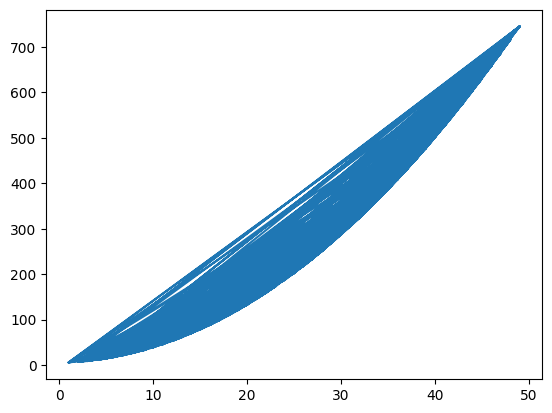

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_numbers, train_labels)
plt.show()

In [ ]:
# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(3,)),
  tf.keras.layers.Dense(100, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='sigmoid'),
  #tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.fit( X , y, epochs=100, verbose=1)    # I am not sure if my fitting here works, my code does not make it here


Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 227768.4688 - mae: 354.8324
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 82475.5703 - mae: 213.1187
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 16402.2051 - mae: 93.3548
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 720.6600 - mae: 17.4815
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 388.1382 - mae: 13.7382
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 94.9603 - mae: 6.6657
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 13.6759 - mae: 3.3632
Epoch 8/100
16/16 [==============================] - 0s 8ms/step - loss: 11.9111 - mae: 3.1111
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 11.2222 - mae: 3.0279
Epoch 10/100
16/16 [==============================] - 0s 9ms/step - loss: 10.4286 - mae: 2.9069
Epoch 11/100
16/16 [========

In [ ]:
test_number = [random.randrange(1, 50, 1) for i in range(100)]
predictions = model.predict(trans_x( test_number) )
print(predictions)
print([mod(x) for x in test_number])

4/4 [==============================] - 0s 4ms/step
[[305.9963   ]
 [ 78.44806  ]
 [744.0167   ]
 [345.14563  ]
 [453.43094  ]
 [305.9963   ]
 [202.82794  ]
 [ 26.775408 ]
 [133.20825  ]
 [325.27344  ]
 [744.0167   ]
 [365.61267  ]
 [109.51743  ]
 [251.73473  ]
 [  4.2261972]
 [121.065056 ]
 [ 78.44806  ]
 [408.33188  ]
 [ 26.775408 ]
 [430.58386  ]
 [408.33188  ]
 [187.71562  ]
 [408.33188  ]
 [ 60.713066 ]
 [234.83748  ]
 [187.71562  ]
 [550.7688   ]
 [ 69.28278  ]
 [ 69.28278  ]
 [603.00757  ]
 [ 88.20895  ]
 [500.90988  ]
 [  5.656834 ]
 [159.27599  ]
 [234.83748  ]
 [ 32.377148 ]
 [744.0167   ]
 [630.01953  ]
 [  7.7104735]
 [145.94705  ]
 [500.90988  ]
 [ 98.5654   ]
 [603.00757  ]
 [  5.656834 ]
 [453.43094  ]
 [603.00757  ]
 [ 60.713066 ]
 [121.065056 ]
 [173.19832  ]
 [ 60.713066 ]
 [685.8281   ]
 [657.6263   ]
 [109.51743  ]
 [ 98.5654   ]
 [218.5352   ]
 [ 21.76408  ]
 [ 98.5654   ]
 [  5.656834 ]
 [ 78.44806  ]
 [ 38.56735  ]
 [159.27599  ]
 [159.27599  ]
 [121.065056 ]
 [ 6

In [ ]:


from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Classic approach: RNN in Tensorflow


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.2550391 , -0.33258602, -0.23841745,  0.16099699,  0.30643624,
        -0.2687475 , -0.42649776,  0.37091383,  0.77455515,  0.01527119]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy() #convert log-odds to probabilities

array([[0.07132419, 0.06600223, 0.07251962, 0.10812323, 0.12504965,
        0.07035312, 0.06008599, 0.13337816, 0.19970268, 0.09346113]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.6542282

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2022-12-20 15:49:49.084881: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x36dbee10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-20 15:49:49.084958: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2022-12-20 15:49:49.104215: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-20 15:49:49.433797: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 16s 7ms/step - loss: 0.2938 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1437 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1083 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0900 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0765 - accuracy: 0.9760


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.0763 - accuracy: 0.9760 - 2s/epoch - 5ms/step


[0.07628161460161209, 0.9760000109672546]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


In [ ]:
probability_model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.utils import to_categorical
import numpy as np

model = Sequential()

model.add(LSTM(32, return_sequences=True, input_shape=(None, 5)))
model.add(LSTM(8, return_sequences=True))
model.add(TimeDistributed(Dense(2, activation='sigmoid')))

print(model.summary(90))

model.compile(loss='categorical_crossentropy',
              optimizer='adam')

def train_generator():
    while True:
        sequence_length = np.random.randint(10, 100)
        x_train = np.random.random((1000, sequence_length, 5))
        # y_train will depend on past 5 timesteps of x
        y_train = x_train[:, :, 0]
        for i in range(1, 5):
            y_train[:, i:] += x_train[:, :-i, i]
        y_train = to_categorical(y_train > 2.5)
        yield x_train, y_train

model.fit_generator(train_generator(), steps_per_epoch=30, epochs=10, verbose=1)

Model: "sequential_1"
__________________________________________________________________________________________
 Layer (type)                           Output Shape                        Param #       
 lstm (LSTM)                            (None, None, 32)                    4864          
                                                                                          
 lstm_1 (LSTM)                          (None, None, 8)                     1312          
                                                                                          
 time_distributed (TimeDistributed)     (None, None, 2)                     18            
                                                                                          
Total params: 6,194
Trainable params: 6,194
Non-trainable params: 0
__________________________________________________________________________________________
None


/tmp/ipykernel_4870/3874790503.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator(), steps_per_epoch=30, epochs=10, verbose=1)


Epoch 1/10


2022-12-21 13:33:52.806300: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


30/30 [==============================] - 11s 41ms/step - loss: 0.6879
Epoch 2/10
30/30 [==============================] - 1s 37ms/step - loss: 0.6672
Epoch 3/10
30/30 [==============================] - 1s 26ms/step - loss: 0.5864
Epoch 4/10
30/30 [==============================] - 1s 26ms/step - loss: 0.4488
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.3410
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.2718
Epoch 7/10
30/30 [==============================] - 1s 27ms/step - loss: 0.2252
Epoch 8/10
30/30 [==============================] - 1s 27ms/step - loss: 0.1915
Epoch 9/10
30/30 [==============================] - 1s 24ms/step - loss: 0.1653
Epoch 10/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1450


In [ ]:
sequence_length = np.random.randint(10, 100)
x_train = np.random.random((1000, sequence_length, 5))
# y_train will depend on past 5 timesteps of x
y_train = x_train[:, :, 0]
for i in range(1, 5):
    y_train[:, i:] += x_train[:, :-i, i]
y_train = to_categorical(y_train > 2.5)
x_train

array([[[0.89595135, 0.36547911, 0.70471329, 0.86786702, 0.5561281 ],
        [0.74253824, 0.15908736, 0.44148042, 0.31239749, 0.66938551],
        [1.83159027, 0.58117953, 0.68607103, 0.38843869, 0.54332747],
        ...,
        [3.01537052, 0.70694931, 0.24800594, 0.28030826, 0.22476184],
        [3.64436222, 0.18972542, 0.48676437, 0.80163549, 0.2329268 ],
        [2.27142269, 0.4833883 , 0.34883417, 0.15992898, 0.90357458]],

       [[0.4647752 , 0.72273926, 0.79129119, 0.0418271 , 0.14619803],
        [0.72385335, 0.71358085, 0.80243435, 0.92023347, 0.25292091],
        [2.45256639, 0.78361039, 0.67591634, 0.69436284, 0.21642717],
        ...,
        [2.52944072, 0.65391915, 0.02393266, 0.9741048 , 0.72499794],
        [2.76378234, 0.31210771, 0.76588637, 0.83630796, 0.00895981],
        [1.95640889, 0.51176132, 0.57580818, 0.01631257, 0.26175483]],

       [[0.48831861, 0.28681358, 0.07476653, 0.94271848, 0.8947697 ],
        [0.52347893, 0.16438645, 0.71058957, 0.36084435, 0.1